In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
print('total Validation Dataset0.2 images:', len(os.listdir('/content/drive/My Drive/Dataset/valid/Dataset0.2')))
print('total Validation Def images:', len(os.listdir('/content/drive/My Drive/Dataset/valid/Def')))
print('total Training Dataset0.2 images:', len(os.listdir('/content/drive/My Drive/Dataset/train/Dataset0.2')))
print('total Training Def images:', len(os.listdir('/content/drive/My Drive/Dataset/train/Def')))

total Validation Dataset0.2 images: 100
total Validation Def images: 100
total Training Dataset0.2 images: 100
total Training Def images: 100


In [ ]:
train_dir = '/content/drive/My Drive/Dataset/train'
validation_dir = '/content/drive/My Drive/Dataset/valid'

In [ ]:
from tensorflow.keras.models import Sequential
from keras import layers
from tensorflow.keras.layers import Dense,Conv2D,Flatten,MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping,ReduceLROnPlateau
model = Sequential()
model.add(layers.Conv2D(256, (3, 3), activation='relu',input_shape=(227, 227, 3)))
model.add(layers.MaxPooling2D((3, 3)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((3, 3)))
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='sigmoid'))
model.add(layers.Dense(2, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 225, 225, 256)     7168      
                                                                 
 max_pooling2d (MaxPooling2  (None, 75, 75, 256)       0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 73, 73, 64)        147520    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 24, 24, 64)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 36864)             0         
                                                                 
 dense (Dense)               (None, 256)               9

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=10,
                                   zoom_range=0.4,
                                   horizontal_flip=True,
                                   vertical_flip=True,
                                   fill_mode='nearest')
Val_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(227, 227),
    batch_size=1,
    class_mode='categorical')
validation_generator = Val_datagen.flow_from_directory(
    validation_dir,
    target_size=(227, 227),
    batch_size=1,
    class_mode='categorical')

Found 200 images belonging to 2 classes.
Found 200 images belonging to 2 classes.


In [ ]:
early = EarlyStopping(monitor='val_loss', mode='min', patience=2)
learning_rate_reduction = ReduceLROnPlateau(monitor='val_loss', min_lr=0.000001)
callbacks_list = [ early, learning_rate_reduction]
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
history = model.fit(train_generator, epochs=25, validation_data=validation_generator, callbacks=callbacks_list)

Epoch 1/25
200/200 [==============================] - 246s 1s/step - loss: 0.1504 - accuracy: 0.9600 - val_loss: 4.2198e-05 - val_accuracy: 1.0000 - lr: 0.0010
Epoch 2/25
200/200 [==============================] - 118s 589ms/step - loss: 1.0091 - accuracy: 0.4700 - val_loss: 0.7014 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 3/25
200/200 [==============================] - 119s 596ms/step - loss: 0.7334 - accuracy: 0.5350 - val_loss: 0.6994 - val_accuracy: 0.5000 - lr: 0.0010


In [ ]:
model.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk


In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
img_path='/content/drive/My Drive/Dataset/train/Def/Augmented_Image (58).png'

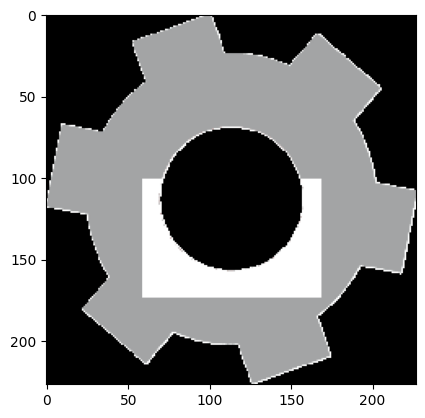

1/1 [==============================] - 0s 319ms/step
[[0.5127659 0.4872341]]


In [ ]:
img = image.load_img(img_path, target_size=(227, 227))
plt.imshow(img)
plt.show()
img = image.img_to_array(img)
x = np.expand_dims(img, axis=0) * 1./255
score = model.predict(x)
print(score)